# Bad naming conventions

### Loading Libraires

In [10]:
# Math
import math

# Operating System
import random
import inspect
import logging
import operator
import functools
from importlib import reload
from datetime import datetime

# Collections
from collections import namedtuple

# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.metrics import mean_squared_error

In [2]:
gta = tuple([1,2,3,4])
gta

(1, 2, 3, 4)

In [3]:
abc = list(range(100))

REF_IND_24G_88A = list(zip(abc, list(range(0, 500, 5))))

tuple = [math.pow(x[0] - x[1],2) for x in REF_IND_24G_88A]

rtrn = math.sqrt(functools.reduce(operator.add, tuple) / len(tuple))

In [4]:
rtrn

229.20732972573106

In [5]:
another_tuple = tuple([2,3,4])

TypeError: 'list' object is not callable

In [6]:
my_list = [1,2,3,4]

In [7]:
validating = my_list([2,3,4])

TypeError: 'list' object is not callable

In [8]:
%reset_selective -f [tuple]

#### Complex One-Liner

In [11]:
import math

rmse = math.sqrt(functools.reduce(operator.add, [math.pow(x[0] - x[1], 2) for x in list(zip(list(range(100)), list(range(0,500,5))))]) / 100)
rmse

229.20732972573106

#### Properly Named & Structured Version

In [12]:
first_series_small = list(range(100))

larger_series_by_five = list(range(0, 500, 5))

merged_series_by_index = list(zip(first_series_small, larger_series_by_five))

merged_squared_errors = [math.pow(x[0] - x[1],2) for x in merged_series_by_index]

merged_rmse = math.sqrt(functools.reduce(operator.add, merged_squared_errors) / len(merged_squared_errors))
merged_rmse

229.20732972573106

#### How It Should be Written

In [13]:
def calculate_rmse_for_generated_sequences(**kwargs):
    first_sequence = np.arange(kwargs['seq_1_start'], kwargs['seq_1_stop'], kwargs['seq_1_step'], float)
    second_sequence = np.arange(kwargs['seq_2_start'], kwargs['seq_2_stop'], kwargs['seq_2_step'], float)
    return mean_squared_error(first_sequence, second_sequence, squared=False)

calculate_rmse_for_generated_sequences(**{'seq_1_start': 0, 'seq_1_stop': 100, 'seq_1_step': 1, 
                                        'seq_2_start': 0, 'seq_2_stop': 500, 'seq_2_step': 5})

229.20732972573106

In [14]:
calculate_rmse_for_generated_sequences(**{'seq_1_start': 0, 'seq_1_stop': 1000, 'seq_1_step': 2, 
                                        'seq_2_start': 500, 'seq_2_stop': 1000, 'seq_2_step': 1})

289.10811126635656

In [15]:
calculate_rmse_for_generated_sequences(**{'seq_1_start': -10000, 'seq_1_stop': 0, 'seq_1_step': 5, 
                                        'seq_2_start': 0, 'seq_2_stop': 2000, 'seq_2_step': 1})

6430.966956842493

#### Generating a Logistic Map Series

In [16]:
def logistic_map(x, recurrence):
    return x * recurrence * (1 - x)

def log_map(n, x, r, collection=None):
    if collection is None:
        collection = []
    calculated_value = logistic_map(x, r)
    collection.append(calculated_value)
    if n > 0:
        log_map(n-1, calculated_value, r, collection)      
    return np.array(collection[:n])

def generate_log_map_and_plot(iterations, recurrence, start):
    map_series = log_map(iterations, start, recurrence)
    with plt.style.context(style='seaborn-v0_8'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        ax.plot(range(iterations), map_series)
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
    return (map_series, fig)

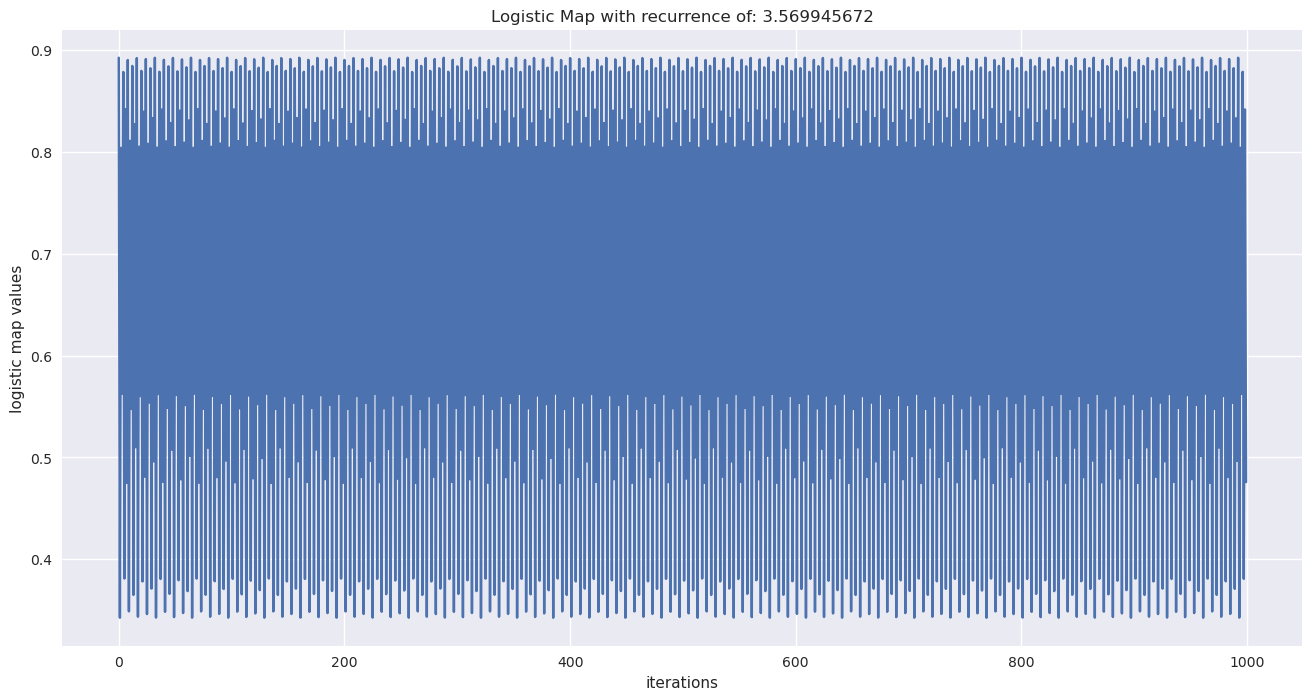

In [17]:
log_map_values_accumulation, log_map_plot = generate_log_map_and_plot(1000, 3.569945672, 0.5)

In [18]:
log_map_values_decay, log_map_plot_decay = generate_log_map_and_plot(1000, 2.99595, 0.5)

In [19]:
log_map_values_chaos, log_map_plot_chaos = generate_log_map_and_plot(1000, 3.869954, 0.5)

#### Statistical Analysis Function with a Nightmarish Tuple Unpacking

In [20]:
def analyze_series(series):
    minimum = np.min(series)
    mean = np.average(series)
    maximum = np.max(series)
    q1 = np.quantile(series, 0.25)
    median = np.quantile(series, 0.5)
    q3 = np.quantile(series, 0.75)
    p5, p95 = np.percentile(series, [5, 95])
    std_dev = np.std(series)
    variance = np.var(series)
    return ((minimum, mean, maximum), (std_dev, variance), (p5, q1, median, q3, p95))

In [21]:
get_all_of_it = analyze_series(log_map_values_chaos)
get_all_of_it

((0.12172747725608367, 0.5935408729262835, 0.9674885),
 (0.2964432858377004, 0.08787862171825256),
 (0.12954481791157788,
  0.33211094455151413,
  0.6104050553104345,
  0.9051939411982387,
  0.965322993975222))

In [22]:
mean_of_chaos_series = get_all_of_it[0][1]
mean_of_chaos_series

0.5935408729262835

In [23]:
((minimum, mean, maximum), (std_dev, variance), (p5, q1, median, q3, p95)) = analyze_series(log_map_values_chaos)
mean

0.5935408729262835

#### Refactoring The Series & Plot Generator with Named Tuples

In [24]:
def generate_log_map_and_plot_named(iterations, recurrence, start):
    map_series = log_map(iterations, start, recurrence)
    MapData = namedtuple('MapData', 'series plot')
    with plt.style.context(style='seaborn-v0_8'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        ax.plot(range(iterations), map_series)
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
    return MapData(map_series, fig)

In [25]:
other_chaos_series = generate_log_map_and_plot_named(1000, 3.7223976, 0.5)

In [26]:
other_chaos_series.series

array([0.9305994 , 0.24040791, 0.67975427, 0.81032278, 0.57213166,
       0.91123186, 0.30109864, 0.78333483, 0.63177043, 0.86596575,
       0.43205522, 0.91341498, 0.29439719, 0.77324428, 0.65267612,
       0.84383032, 0.49054019, 0.93026629, 0.24147535, 0.68181299,
       0.80755197, 0.57850446, 0.90765845, 0.31199123, 0.7990227 ,
       0.59776279, 0.89502235, 0.34974659, 0.84656222, 0.48351944,
       0.92958836, 0.24364521, 0.6859717 , 0.80185852, 0.59141986,
       0.89948912, 0.33653616, 0.83113535, 0.52243619, 0.92872561,
       0.2464017 , 0.6912042 , 0.7945121 , 0.6077284 , 0.88739946,
       0.37194815, 0.86956222, 0.42220836, 0.90807317, 0.31073194,
       0.7972542 , 0.60168814, 0.89210803, 0.35828557, 0.85584257,
       0.45925477, 0.92441957, 0.26007657, 0.71632609, 0.75640244,
       0.68588074, 0.80198442, 0.59113688, 0.89968142, 0.3359641 ,
       0.83043796, 0.52415363, 0.92842776, 0.24735203, 0.69299505,
       0.79195093, 0.61331956, 0.88279889, 0.38513789, 0.88148

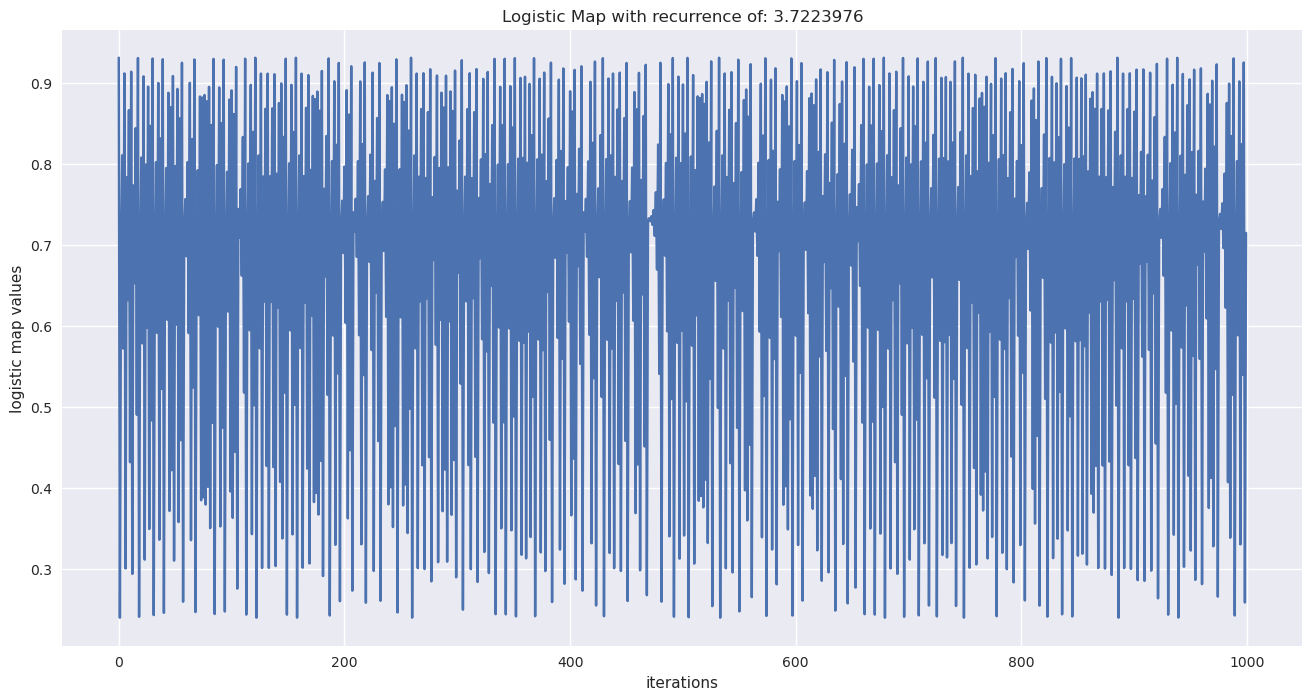

In [27]:
other_chaos_series.plot

In [28]:
quad_cyle = generate_log_map_and_plot_named(100, 3.44949, 0.5)

In [29]:
bi_cycle = generate_log_map_and_plot_named(100, 3.564407, 0.5)

In [30]:
bi_cycle.series

array([0.89110175, 0.34588799, 0.80644526, 0.55637293, 0.8797744 ,
       0.37701235, 0.83718666, 0.48584705, 0.89038778, 0.34787679,
       0.80861613, 0.55161366, 0.88160628, 0.37204086, 0.83273979,
       0.4964657 , 0.89105723, 0.34601212, 0.80658158, 0.55607506,
       0.87989378, 0.37668907, 0.83690286, 0.48652896, 0.89045492,
       0.34768992, 0.80841335, 0.55205965, 0.88144147, 0.37248911,
       0.83314796, 0.49549691, 0.89102947, 0.34608949, 0.80666649,
       0.55588945, 0.87996786, 0.37648845, 0.83672635, 0.48695276,
       0.89049498, 0.34757841, 0.80829223, 0.55232589, 0.88134241,
       0.37275844, 0.83339252, 0.49491586, 0.89100962, 0.34614484,
       0.80672721, 0.5557567 , 0.88002069, 0.37634534, 0.83660027,
       0.48725535, 0.8905228 , 0.34750097, 0.80820806, 0.55251085,
       0.88127329, 0.37294632, 0.83356282, 0.49451103, 0.89099436,
       0.34618737, 0.80677385, 0.55565472, 0.88006119, 0.37623562,
       0.83650351, 0.48748751, 0.8905437 , 0.34744278, 0.80814

#### Refactoring The Statistical Attribute Function with Named Tuples

In [31]:
def analyze_series_legible(series):
    BasicStats = namedtuple('BasicStats', 'minimum mean maximum')
    Variation = namedtuple('Variation', 'std_dev variance')
    Quantiles = namedtuple('Quantiles', 'p5 q1 median q3 p95')
    Analysis = namedtuple('Analysis', ['basic_stats', 'variation', 'quantiles'])
    minimum = np.min(series)
    mean = np.average(series)
    maximum = np.max(series)
    q1 = np.quantile(series, 0.25)
    median = np.quantile(series, 0.5)
    q3 = np.quantile(series, 0.75)
    p5, p95 = np.percentile(series, [5, 95])
    std_dev = np.std(series)
    variance = np.var(series)
    return Analysis(BasicStats(minimum, mean, maximum), 
                    Variation(std_dev, variance), 
                    Quantiles(p5, q1, median, q3, p95))

In [32]:
legible_return_bi_cycle = analyze_series_legible(bi_cycle.series)

In [33]:
legible_return_bi_cycle.variation.std_dev

0.21570993929353727

In [34]:
legible_return_bi_cycle.basic_stats.mean

0.6476504853834991

In [35]:
def generate_log_map_and_plot_final(iterations, recurrence, start):
    map_series = log_map(iterations, start, recurrence)
    stats = analyze_series_legible(map_series)
    MapData = namedtuple('MapData', 'series plot stats')
    with plt.style.context(style='seaborn-v0_8'):
        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(111)
        plus_one_sigma = stats.basic_stats.mean + stats.variation.std_dev
        minus_one_sigma = stats.basic_stats.mean - stats.variation.std_dev
        ax.plot(range(iterations), map_series, label='logistic map series')
        ax.axhline(y=stats.basic_stats.mean, color='g', linestyle='-', label='mean')
        ax.axhline(y=stats.quantiles.median, color='r', linestyle='--', label='median')
        ax.axhline(y=plus_one_sigma, color='orange', linestyle='--', label='+1 sigma')
        ax.axhline(y=minus_one_sigma, color='orange', linestyle='--', label='-1 sigma')
        ax.axhspan(minus_one_sigma, plus_one_sigma, alpha=0.1, color='orange', hatch='||')
        ax.set_xlabel('iterations')
        ax.set_ylabel('logistic map values')
        ax.set_title('Logistic Map with recurrence of: {}'.format(recurrence))
        ax.legend(loc='best')
    return MapData(map_series, fig, stats)

In [36]:
final_series = generate_log_map_and_plot_final(500, 3.7223976, 0.5)

In [37]:
final_series.stats

Analysis(basic_stats=BasicStats(minimum=0.24040790997121192, mean=0.6566275563139555, maximum=0.9305994), variation=Variation(std_dev=0.22155442965032812, variance=0.04908636529768219), quantiles=Quantiles(p5=0.2602061225203078, q1=0.4595280421323526, median=0.7032218512588247, q3=0.855739396254823, p95=0.9243785703994374))

In [38]:
final_series_less_chaos = generate_log_map_and_plot_final(500, 3.44949, 0.5)

##### Try / catch and Exception Handling Woes

In [39]:
numbers = list(range(0, 100)) 

random.shuffle(numbers)

In [41]:
calculated = []

for i in numbers:
    calculated.append(10 / i)

ZeroDivisionError: division by zero

#### A Simple Collection Division Function that will Throw an Exception

In [42]:
def divide_list(base, collection):
    output = []
    for i in collection:
        output.append(base / i)
    return output

In [43]:
blown_up = divide_list(100, numbers)

ZeroDivisionError: division by zero

#### Unsafe Exception Handling Example

In [44]:
def divide_list_unsafe(base, collection):
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except:
            pass
    return output

#### Example of Why Blind Exception Handling is Bad

In [45]:
unsafe = divide_list_unsafe(100, numbers)

In [46]:
len(unsafe)

99

In [47]:
broken = divide_list_unsafe('oops', numbers)

In [48]:
len(broken)

0

#### Catching & Handling a Single Exception Safely

In [49]:
def divide_list_safer(base, collection):
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            print("Couldn't divide {} by {} due to {}".format(base, i, e))
    return output

In [50]:
safer = divide_list_safer(100, numbers)
len(safer)

Couldn't divide 100 by 0 due to division by zero


99

In [51]:
safer_string = divide_list_safer('oops', numbers)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [52]:
reload(logging)
log_file_name = 'ch9_01logs_{}.log'.format(datetime.now().date().strftime('%Y-%m-%d'))
logging.basicConfig(filename=log_file_name, level=logging.INFO)

In [53]:
class CalculationError(ValueError):
    def __init__(self, message, pre, post, *args):
        self.message = message
        self.pre = pre
        self.post = post
        super(CalculationError, self).__init__(message, pre, post, *args)

In [54]:
def divide_values_better(base, collection):
    function_nm = inspect.currentframe().f_code.co_name
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            logging.error(
                "{} -{}- Couldn't divide {} by {} due to {} in {}".format(
                    datetime.now(), type(e), base, i, e, function_nm)
            )
        except TypeError as e:
            logging.error(
                "{} -{}- Couldn't process the base value '{}' ({}) in {}".format(
                datetime.now(), type(e), base, e, function_nm)
            )
            raise e
    input_len = len(collection)
    output_len = len(output)
    if input_len != output_len:
        msg = "The return size of the collection does not match passed in collection size."
        e = CalculationError(msg, input_len, output_len)
        logging.error("{} {} Input: {} Output: {} in {}".format(
            datetime.now(), e.message, e.pre, e.post, function_nm
        ))
        raise e
    return output

In [55]:
better = divide_values_better(100, numbers)

CalculationError: ('The return size of the collection does not match passed in collection size.', 100, 99)

#### Logging Results of Caught & Handled Exceptions

In [56]:
def read_log(log_name):
    try:
        with open(log_name) as log:
            print(log.read())
    except FileNotFoundError as e:
        print("The log file is empty.")

In [57]:
read_log(log_file_name)

ERROR:root:2024-07-24 09:24:16.477605 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2024-07-24 09:24:16.478102 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better



In [58]:
garbage = divide_values_better('oops', numbers)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [59]:
read_log(log_file_name)

ERROR:root:2024-07-24 09:24:16.477605 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2024-07-24 09:24:16.478102 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better
ERROR:root:2024-07-24 09:24:21.231159 -<class 'TypeError'>- Couldn't process the base value 'oops' (unsupported operand type(s) for /: 'str' and 'int') in divide_values_better



#### Final Implementation with Proper Exception Handling & Logging

In [60]:
def divide_values_final(base, collection):
    function_nm = inspect.currentframe().f_code.co_name
    output = []
    for i in collection:
        try:
            output.append(base / i)
        except ZeroDivisionError as e:
            logging.error(
                "{} -{}- Applied Placeholder value '0' for dividing {} by {} due to {} in {}".format(
                    datetime.now(), type(e), base, i, e, function_nm)
            )
            output.append(0.0)
        except TypeError as e:
            logging.error(
                "{} -{}- Couldn't process the base value '{}' ({}) in {}".format(
                datetime.now(), type(e), base, e, function_nm)
            )
            raise e
    input_len = len(collection)
    output_len = len(output)
    if input_len != output_len:
        msg = "The return size of the collection does not match passed in collection size."
        e = CalculationError(msg, input_len, output_len)
        logging.error("{} {} Input: {} Output: {} in {}".format(
            datetime.now(), e.message, e.pre, e.post, function_nm
        ))
        raise e
    return output

In [61]:
placeholder = divide_values_final(100, numbers)
len(placeholder)

100

In [62]:
read_log(log_file_name)

ERROR:root:2024-07-24 09:24:16.477605 -<class 'ZeroDivisionError'>- Couldn't divide 100 by 0 due to division by zero in divide_values_better
ERROR:root:2024-07-24 09:24:16.478102 The return size of the collection does not match passed in collection size. Input: 100 Output: 99 in divide_values_better
ERROR:root:2024-07-24 09:24:21.231159 -<class 'TypeError'>- Couldn't process the base value 'oops' (unsupported operand type(s) for /: 'str' and 'int') in divide_values_better
ERROR:root:2024-07-24 09:24:24.398129 -<class 'ZeroDivisionError'>- Applied Placeholder value '0' for dividing 100 by 0 due to division by zero in divide_values_final



### Use of Global Mutable Objects

#### An Example Utility Function for Maintaining a List of Elements

In [63]:
def features_to_add_to_vector(features, feature_collection=[]):
    [feature_collection.append(x) for x in features]
    return feature_collection

#### Usage of The Simple Listing Function

In [64]:
trial_1 = features_to_add_to_vector(['a', 'b', 'c'])
trial_1

['a', 'b', 'c']

#### Object State Mutation by Repeated Calls to our Function

In [65]:
trial_2 = features_to_add_to_vector(['d', 'e', 'f'])
trial_2

['a', 'b', 'c', 'd', 'e', 'f']

In [66]:
trial_1

['a', 'b', 'c', 'd', 'e', 'f']

In [67]:
trial_3 = features_to_add_to_vector(['g', 'h', 'i'], [])
trial_3

['g', 'h', 'i']

In [68]:
trial_4 = features_to_add_to_vector(['a', 'b', 'c'])

for i in range(0,10):
    features_to_add_to_vector(['z', 'y', 'x'])

trial_4

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'a',
 'b',
 'c',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x',
 'z',
 'y',
 'x']

#### A Fixed Implementation for The Utility Function

In [69]:
def features_to_add_to_vector_updated(features, feature_collection=None):
    collection = feature_collection if feature_collection else list()
    [collection.append(x) for x in features]
    return collection

In [70]:
trial_1a = features_to_add_to_vector_updated(['a', 'b', 'c'])
trial_1a

['a', 'b', 'c']

In [71]:
trial_2a = features_to_add_to_vector_updated(['d', 'e', 'f'])
trial_2a

['d', 'e', 'f']

In [72]:
trial_1a

['a', 'b', 'c']

### Excessively Nested Logic

#### Generating Synthetic Probability Data for The Ensemble Approach

In [73]:
def generate_scores(number, seed=42):
    def get_random():
        return random.uniform(0.0, 1.0)
    random.seed(seed)
    return [(get_random(), get_random()) for x in range(number)]

In [74]:
generated_probabilities = generate_scores(100)
generated_probabilities

[(0.6394267984578837, 0.025010755222666936),
 (0.27502931836911926, 0.22321073814882275),
 (0.7364712141640124, 0.6766994874229113),
 (0.8921795677048454, 0.08693883262941615),
 (0.4219218196852704, 0.029797219438070344),
 (0.21863797480360336, 0.5053552881033624),
 (0.026535969683863625, 0.1988376506866485),
 (0.6498844377795232, 0.5449414806032167),
 (0.2204406220406967, 0.5892656838759087),
 (0.8094304566778266, 0.006498759678061017),
 (0.8058192518328079, 0.6981393949882269),
 (0.3402505165179919, 0.15547949981178155),
 (0.9572130722067812, 0.33659454511262676),
 (0.09274584338014791, 0.09671637683346401),
 (0.8474943663474598, 0.6037260313668911),
 (0.8071282732743802, 0.7297317866938179),
 (0.5362280914547007, 0.9731157639793706),
 (0.3785343772083535, 0.552040631273227),
 (0.8294046642529949, 0.6185197523642461),
 (0.8617069003107772, 0.577352145256762),
 (0.7045718362149235, 0.045824383655662215),
 (0.22789827565154686, 0.28938796360210717),
 (0.0797919769236275, 0.232790886361

#### Consolidation Logic by way of `If, Elif, and Else` Statements

In [75]:
def master_score(prob1, prob2):
    if prob1 < 0.2:
        if prob2 < 0.2:
            return (0, (prob1, prob2))
        elif prob2 < 0.4:
            return (1, (prob1, prob2))
        elif prob2 < 0.6:
            return (2, (prob1, prob2))
        elif prob2 < 0.8:
            return (3, (prob1, prob2))
        else:
            return (4, (prob1, prob2))
    elif prob1 < 0.4:
        if prob2 < 0.2:
            return (1, (prob1, prob2))
        elif prob2 < 0.4:
            return (2, (prob1, prob2))
        elif prob2 < 0.6:
            return (3, (prob1, prob2))
        elif prob2 < 0.8:
            return (4, (prob1, prob2))
        else:
            return (5, (prob1, prob2))
    elif prob1 < 0.6:
        if prob2 < 0.2:
            return (2, (prob1, prob2))
        elif prob2 < 0.4:
            return (3, (prob1, prob2))
        elif prob2 < 0.6:
            return (4, (prob1, prob2))
        elif prob2 < 0.8:
            return (5, (prob1, prob2))
        else:
            return (6, (prob1, prob2))
    elif prob1 < 0.8:
        if prob2 < 0.2:
            return (3, (prob1, prob2))
        elif prob2 < 0.4:
            return (4, (prob1, prob2))
        elif prob2 < 0.6:
            return (5, (prob1, prob2))
        elif prob2 < 0.8:
            return (6, (prob1, prob2))
        else:
            return (7, (prob1, prob2))
    else:
        if prob2 < 0.2:
            return (4, (prob1, prob2))
        elif prob2 < 0.4:
            return (5, (prob1, prob2))
        elif prob2 < 0.6:
            return (6, (prob1, prob2))
        elif prob2 < 0.8:
            return (7, (prob1, prob2))
        else:
            return (8, (prob1, prob2))

def apply_scores(probabilities):
    final_scores = []
    for i in probabilities:
        final_scores.append(master_score(i[0], i[1]))
    return final_scores

In [76]:
scored_data = apply_scores(generated_probabilities)
scored_data

[(3, (0.6394267984578837, 0.025010755222666936)),
 (2, (0.27502931836911926, 0.22321073814882275)),
 (6, (0.7364712141640124, 0.6766994874229113)),
 (4, (0.8921795677048454, 0.08693883262941615)),
 (2, (0.4219218196852704, 0.029797219438070344)),
 (3, (0.21863797480360336, 0.5053552881033624)),
 (0, (0.026535969683863625, 0.1988376506866485)),
 (5, (0.6498844377795232, 0.5449414806032167)),
 (3, (0.2204406220406967, 0.5892656838759087)),
 (4, (0.8094304566778266, 0.006498759678061017)),
 (7, (0.8058192518328079, 0.6981393949882269)),
 (1, (0.3402505165179919, 0.15547949981178155)),
 (5, (0.9572130722067812, 0.33659454511262676)),
 (0, (0.09274584338014791, 0.09671637683346401)),
 (7, (0.8474943663474598, 0.6037260313668911)),
 (7, (0.8071282732743802, 0.7297317866938179)),
 (6, (0.5362280914547007, 0.9731157639793706)),
 (3, (0.3785343772083535, 0.552040631273227)),
 (7, (0.8294046642529949, 0.6185197523642461)),
 (6, (0.8617069003107772, 0.577352145256762)),
 (3, (0.7045718362149235, 

#### A Dictionary-Based Configuration Approach to Handling Business Logic

In [77]:
threshold_dict = {
    '<0.2': 'low',
    '<0.4': 'low_med',
    '<0.6': 'med',
    '<0.8': 'med_high',
    '<1.0': 'high'
}

match_dict = {
    ('low', 'low'): 0,
    ('low', 'low_med'): 1,
    ('low', 'med'): 2,
    ('low', 'med_high'): 3,
    ('low', 'high'): 4,
    ('low_med', 'low'): 1,
    ('low_med', 'low_med'): 2,
    ('low_med', 'med'): 3,
    ('low_med', 'med_high'): 4,
    ('low_med', 'high'): 5,
    ('med', 'low'): 2,
    ('med', 'low_med'): 3,
    ('med', 'med'): 4,
    ('med', 'med_high'): 5,
    ('med', 'high'): 6,
    ('med_high', 'low'): 3,
    ('med_high', 'low_med'): 4,
    ('med_high', 'med'): 5,
    ('med_high', 'med_high'): 6,
    ('med_high', 'high'): 7,
    ('high', 'low'): 4,
    ('high', 'low_med'): 5,
    ('high', 'med'): 6,
    ('high', 'med_high'): 7,
    ('high', 'high'): 8
}


In [78]:
def adjudicate_individual(value):
    if value < 0.2: return threshold_dict['<0.2']
    elif value < 0.4: return threshold_dict['<0.4']
    elif value < 0.6: return threshold_dict['<0.6']
    elif value < 0.8: return threshold_dict['<0.8']
    else: return threshold_dict['<1.0']

def adjudicate_pair(pair):
    return match_dict[(adjudicate_individual(pair[0]), adjudicate_individual(pair[1]))]

def evaluate_raw_scores(scores):
    return [(adjudicate_pair(x), x) for x in scores]

In [79]:
dev_way = evaluate_raw_scores(generated_probabilities)
dev_way

[(3, (0.6394267984578837, 0.025010755222666936)),
 (2, (0.27502931836911926, 0.22321073814882275)),
 (6, (0.7364712141640124, 0.6766994874229113)),
 (4, (0.8921795677048454, 0.08693883262941615)),
 (2, (0.4219218196852704, 0.029797219438070344)),
 (3, (0.21863797480360336, 0.5053552881033624)),
 (0, (0.026535969683863625, 0.1988376506866485)),
 (5, (0.6498844377795232, 0.5449414806032167)),
 (3, (0.2204406220406967, 0.5892656838759087)),
 (4, (0.8094304566778266, 0.006498759678061017)),
 (7, (0.8058192518328079, 0.6981393949882269)),
 (1, (0.3402505165179919, 0.15547949981178155)),
 (5, (0.9572130722067812, 0.33659454511262676)),
 (0, (0.09274584338014791, 0.09671637683346401)),
 (7, (0.8474943663474598, 0.6037260313668911)),
 (7, (0.8071282732743802, 0.7297317866938179)),
 (6, (0.5362280914547007, 0.9731157639793706)),
 (3, (0.3785343772083535, 0.552040631273227)),
 (7, (0.8294046642529949, 0.6185197523642461)),
 (6, (0.8617069003107772, 0.577352145256762)),
 (3, (0.7045718362149235, 

#### A Function to Calculate just How Many Lines of Code we'd have to Write

In [81]:
import math

def how_many_terrible_lines(levels):
    return ((5**levels) * 2) + math.factorial(levels)

In [82]:
how_many_terrible_lines(4)

1274

In [83]:
how_many_terrible_lines(8)

821570

In [84]:
8**5

32768

#### A Better Solution that Effortlessly Scales

In [85]:
def generate_scores_updated(number, elements, seed=42):
    def get_random():
        return random.uniform(0.0, 1.0)
    random.seed(seed)
    return [tuple(get_random() for y in range(elements)) for x in range(number)]

In [86]:
larger_probabilities = generate_scores_updated(100, 8)
larger_probabilities

[(0.6394267984578837,
  0.025010755222666936,
  0.27502931836911926,
  0.22321073814882275,
  0.7364712141640124,
  0.6766994874229113,
  0.8921795677048454,
  0.08693883262941615),
 (0.4219218196852704,
  0.029797219438070344,
  0.21863797480360336,
  0.5053552881033624,
  0.026535969683863625,
  0.1988376506866485,
  0.6498844377795232,
  0.5449414806032167),
 (0.2204406220406967,
  0.5892656838759087,
  0.8094304566778266,
  0.006498759678061017,
  0.8058192518328079,
  0.6981393949882269,
  0.3402505165179919,
  0.15547949981178155),
 (0.9572130722067812,
  0.33659454511262676,
  0.09274584338014791,
  0.09671637683346401,
  0.8474943663474598,
  0.6037260313668911,
  0.8071282732743802,
  0.7297317866938179),
 (0.5362280914547007,
  0.9731157639793706,
  0.3785343772083535,
  0.552040631273227,
  0.8294046642529949,
  0.6185197523642461,
  0.8617069003107772,
  0.577352145256762),
 (0.7045718362149235,
  0.045824383655662215,
  0.22789827565154686,
  0.28938796360210717,
  0.07979

In [87]:
def updated_adjudication(value):
    if value < 0.2 : return 0
    elif value < 0.4: return 1
    elif value < 0.6: return 2
    elif value < 0.8: return 3
    else: return 4

def score_larger(scores):
    return sum(updated_adjudication(x) for x in scores)

def evaluate_larger_scores(probs):
    return [(score_larger(x), x) for x in probs]

In [88]:
simpler_solution = evaluate_larger_scores(larger_probabilities)
simpler_solution

[(15,
  (0.6394267984578837,
   0.025010755222666936,
   0.27502931836911926,
   0.22321073814882275,
   0.7364712141640124,
   0.6766994874229113,
   0.8921795677048454,
   0.08693883262941615)),
 (10,
  (0.4219218196852704,
   0.029797219438070344,
   0.21863797480360336,
   0.5053552881033624,
   0.026535969683863625,
   0.1988376506866485,
   0.6498844377795232,
   0.5449414806032167)),
 (15,
  (0.2204406220406967,
   0.5892656838759087,
   0.8094304566778266,
   0.006498759678061017,
   0.8058192518328079,
   0.6981393949882269,
   0.3402505165179919,
   0.15547949981178155)),
 (19,
  (0.9572130722067812,
   0.33659454511262676,
   0.09274584338014791,
   0.09671637683346401,
   0.8474943663474598,
   0.6037260313668911,
   0.8071282732743802,
   0.7297317866938179)),
 (22,
  (0.5362280914547007,
   0.9731157639793706,
   0.3785343772083535,
   0.552040631273227,
   0.8294046642529949,
   0.6185197523642461,
   0.8617069003107772,
   0.577352145256762)),
 (7,
  (0.7045718362149235

In [89]:
ridiculous_ensemble = generate_scores_updated(100, 100)
ridiculous_ensemble

[(0.6394267984578837,
  0.025010755222666936,
  0.27502931836911926,
  0.22321073814882275,
  0.7364712141640124,
  0.6766994874229113,
  0.8921795677048454,
  0.08693883262941615,
  0.4219218196852704,
  0.029797219438070344,
  0.21863797480360336,
  0.5053552881033624,
  0.026535969683863625,
  0.1988376506866485,
  0.6498844377795232,
  0.5449414806032167,
  0.2204406220406967,
  0.5892656838759087,
  0.8094304566778266,
  0.006498759678061017,
  0.8058192518328079,
  0.6981393949882269,
  0.3402505165179919,
  0.15547949981178155,
  0.9572130722067812,
  0.33659454511262676,
  0.09274584338014791,
  0.09671637683346401,
  0.8474943663474598,
  0.6037260313668911,
  0.8071282732743802,
  0.7297317866938179,
  0.5362280914547007,
  0.9731157639793706,
  0.3785343772083535,
  0.552040631273227,
  0.8294046642529949,
  0.6185197523642461,
  0.8617069003107772,
  0.577352145256762,
  0.7045718362149235,
  0.045824383655662215,
  0.22789827565154686,
  0.28938796360210717,
  0.0797919769

In [90]:
ridiculous_eval = evaluate_larger_scores(ridiculous_ensemble)
ridiculous_eval

[(193,
  (0.6394267984578837,
   0.025010755222666936,
   0.27502931836911926,
   0.22321073814882275,
   0.7364712141640124,
   0.6766994874229113,
   0.8921795677048454,
   0.08693883262941615,
   0.4219218196852704,
   0.029797219438070344,
   0.21863797480360336,
   0.5053552881033624,
   0.026535969683863625,
   0.1988376506866485,
   0.6498844377795232,
   0.5449414806032167,
   0.2204406220406967,
   0.5892656838759087,
   0.8094304566778266,
   0.006498759678061017,
   0.8058192518328079,
   0.6981393949882269,
   0.3402505165179919,
   0.15547949981178155,
   0.9572130722067812,
   0.33659454511262676,
   0.09274584338014791,
   0.09671637683346401,
   0.8474943663474598,
   0.6037260313668911,
   0.8071282732743802,
   0.7297317866938179,
   0.5362280914547007,
   0.9731157639793706,
   0.3785343772083535,
   0.552040631273227,
   0.8294046642529949,
   0.6185197523642461,
   0.8617069003107772,
   0.577352145256762,
   0.7045718362149235,
   0.045824383655662215,
   0.227898